In [5]:
cd /content/drive/My Drive/Studier/Master/Master Thesis/Coding/

/content/drive/My Drive/Studier/Master/Master Thesis/Coding


In [ ]:
# Test
%run ./c-LSTM-LM/testfile.py

ERROR:root:File `'./c-LSTM-LM/testfile.py'` not found.


In [ ]:
# Train
%run ./c-LSTM-LM/train.py

In [ ]:
# Test generate script
!pip install mido
%run ./c-LSTM-LM/generate_deeper.py


------ Parameters -----
            midi:  ./c-LSTM-LM/sample_data/sample.midi
          output:  ./c-LSTM-LM/test_output/
           param:  ./c-LSTM-LM/checkpoint_03062020_1030/model.param.json
      checkpoint:  ./c-LSTM-LM/checkpoint_03062020_1030/
            seed:  0
          window:  20
     temperature:  2.0
        LM_model:  model_06.pt
Notes:  [('rest', '32.0'), ('72', '1.0'), ('74', '1.0'), ('76', '1.0'), ('77', '1.0'), ('76', '1.0'), ('74', '1.0'), ('72', '1.0'), ('rest', '1.0'), ('76', '1.0'), ('77', '1.0'), ('79', '1.0'), ('81', '1.0'), ('79', '1.0'), ('77', '1.0'), ('76', '1.0'), ('rest', '1.0'), ('72', '1.5'), ('72', '1.5'), ('72', '1.5'), ('72', '1.0'), ('rest', '1.0'), ('72', '0.5'), ('72', '0.5'), ('74', '0.5'), ('74', '0.5'), ('76', '0.5'), ('76', '0.5'), ('77', '0.5'), ('77', '0.5'), ('76', '1.0'), ('74', '1.0'), ('72', '1.5'), ('rest', '32.0')] <class 'list'>
idx2feature:  {'0': 'length[-10]=0.25', '1': 'length[-10]=0.5', '2': 'length[-10]=0.75', '3': 'length[-1

/content/drive/My Drive/Studier/Master/Master Thesis/Coding/c-LSTM-LM/generate_deeper.py:53: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature
Generate lyrics [====================>] (100.0 %)

never|nev_er
know|know
what|what
everyday|ev_er_y_day
happened|hap_pened
to|to
hide|hide
an|an
awful|aw_ful
kind|kind
of|of
extremes|ex_tremes
in|in
a|a
funky|funk_y
mating|mat_ing
woh|woh
woh|woh
hopeless|hope_less
[0, '<None>', 'rest', 32]
[1, 0, '72', 1, 'never|nev_er', 'nev', ['nev', 'er'], '<BB>']
[2, 0, '74', 1, 'never|nev_er', 'er', ['nev', 'er'], '<BB>']
[3, 1, '76', 1, 'know|know', 'know', ['know'], '<None>']
[4, 2, '77', 1, 'what|what', 'what', ['what'], '<None>']
[5, 3, '76', 1, 'everyday|ev_er_y_day', 'ev', ['ev', 'er', 'y', 'day'], '<None>']
[6, 3, '74', 1, 'everyday|ev_er_y_day', 'er', ['ev', 'er', 'y', 'day'], '<None>']
[7, 3, '72', 1, 'everyday|ev_er_y_day', 'y', ['ev', 'er', 'y', 'day'], '<None>']
[8, '<None>', 'rest', 1]
GET HERE???
[9, 3, '76', 1, 'everyday|ev_er_y_day', 'day', ['ev', 'er', 'y', 'day'], '<None>']
[10, 4, '77', 1, 'happened|hap_pened', 'hap', ['hap', 'pened'], '<None>']
[11, 4, '79', 1, 'happened|hap_pened', 'pened', ['hap', 'pened'], '<None>']
[12, 5

Generate lyrics [====================>] (100.0 %)


In [1]:
cd /content/drive/My Drive/Studier/Master/Master Thesis/Coding/

/content/drive/My Drive/Studier/Master/Master Thesis/Coding


In [2]:
# Test statistics script
!pip install mido
%run ./c-LSTM-LM/statistics.py

SyntaxError: ignored

In [ ]:
import os
import numpy as np

data = './dataset_creation/augmented_dataset4_sorted_test'
subfolders = os.listdir(data)
list_of_song_notes = []

# Load data
for subfolder in subfolders[0:1]:
    print("Currently loading data from: " + subfolder)
    subfolder_path = os.path.join(data, subfolder)
    files = os.listdir(subfolder_path)
    for i, file in enumerate(files[39:40]):
        print("Song name: ", file.split('.')[0])
        try:
            notes = np.load(os.path.join(subfolder_path, file), allow_pickle=True)
        except OSError as e:
            print("File %s could not be loaded. Skips file."%file)
            continue
        # print(i, len(notes))
        list_of_song_notes.append(notes) 

tot_og_line_syllcnts = []
song_num = 0
for song_notes in list_of_song_notes:
  print(song_num)
  song_num += 1
  first_word_line = None
  line_syllcnt = len(notes[1][6])
  og_line_syllcnts = [] 
  for i, note in enumerate(song_notes):
    print(note)
    word_idx = note[1]
    if word_idx != 0 and type(note[6]) == list: # If not first word
      if note[-1] == '<BB>':
        if word_idx == first_word_line:
          continue
        og_line_syllcnts.append(line_syllcnt)
        line_syllcnt = len(note[6]) # Reset line syllable cnt for new line
        first_word_line = word_idx
      elif note[-1] == '<BL>':
        if word_idx == first_word_line:
          continue
        og_line_syllcnts.append(line_syllcnt)
        line_syllcnt = len(note[6]) # Reset line syllable cnt for new line
        first_word_line = word_idx
      elif note[0] == len(notes)-2: # If last note
        og_line_syllcnts.append(line_syllcnt)
      line_syllcnt += 1
  print(og_line_syllcnts)
  tot_og_line_syllcnts += og_line_syllcnts

print(tot_og_line_syllcnts)
print('Average number of syllables per line: ', np.average(tot_og_line_syllcnts))



Currently loading data from: sub_folder1
Song name:  0e6ba1d36a2f9be249c4039af82cf6d4
0
[0 '<None>' 'rest' 32 '<None>' '<None>' '<None>' '<None>']
[1 0 64.0 1.0 'How' 'How' list(['How']) '<BB>']
[2 '<None>' 'rest' 1.0 '<None>' '<None>' '<None>' '<None>']
[3 1 64.0 1.0 'about' 'about' list(['about']) '<None>']
[4 2 65.0 1.0 'getting' 'get' list(['get', 'ting']) '<None>']
[5 2 'rest' 1.0 'getting' '<None>' list(['get', 'ting']) '<None>']
[6 2 64.0 2.0 'getting' 'ting' list(['get', 'ting']) '<None>']
[7 '<None>' 'rest' 1.0 '<None>' '<None>' '<None>' '<None>']
[8 3 64.0 1.0 'of' 'of' list(['of']) '<None>']
[9 4 64.0 2.0 'these' 'these' list(['these']) '<None>']
[10 '<None>' 'rest' 16.0 '<None>' '<None>' '<None>' '<None>']
[11 5 64.0 1.0 'How' 'How' list(['How']) '<None>']
[12 6 65.0 1.0 'about' 'about' list(['about']) '<None>']
[13 7 64.0 1.0 'stopping' 'stop' list(['stop', 'ping']) '<None>']
[14 7 65.0 1.0 'stopping' 'ping' list(['stop', 'ping']) '<None>']
[15 '<None>' 'rest' 1.0 '<None>'

Counter({2: 29, 10: 26, 4: 22, 6: 19, 3: 19, 5: 19, 9: 19, 7: 17, 1: 15, 8: 14})


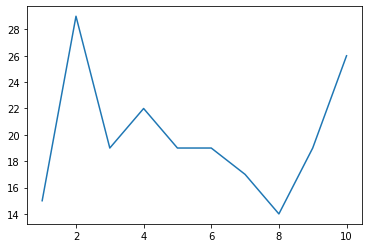

In [28]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import random
list1 = []

for i in range(1, 200):
  list1.append(random.randint(1,10))

# print(list1)

c = Counter(list1)
print(c)
keys = sorted(c.keys())
vals = [c[key] for key in keys]

plt.plot(keys, vals)